In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
import numpy as np
x = np.array(df)

In [5]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(x)

KMeans(n_clusters=3)

In [6]:
# 可以把分群視為利用相似度打上答案的動作
df["labels"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# 分群特徵的中心點
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
# 用分群的 Silhouette Score 判斷最佳的分群數
from sklearn.metrics import silhouette_score
for k in range(2, 20):
    test = KMeans(n_clusters=k)
    test.fit(x)
    score = silhouette_score(x, test.labels_)
    print(k, score)

2 0.681046169211746
3 0.5528190123564091
4 0.4980505049972864
5 0.48874888709310454
6 0.36483400396700155
7 0.3495672330216137
8 0.35193407152279993
9 0.34095394299814025
10 0.3423458494251019
11 0.29379373310730794
12 0.2847862864804684
13 0.29268015578363404
14 0.30301150572490354
15 0.28010082554014787
16 0.2938127002720103
17 0.27581754519452895
18 0.25833906986493904
19 0.2866564392095759


In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

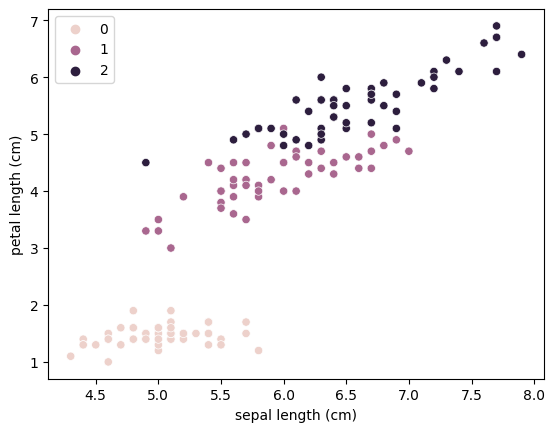

In [22]:
# 畫出二維分群示意圖
x_axis = df["sepal length (cm)"]
y_axis = df["petal length (cm)"]
sns.scatterplot(x=x_axis, y=y_axis, hue=iris["target"])